<a href="https://colab.research.google.com/github/arshadzahangirchowdhury/EMD/blob/main/Fastener_Analysis_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fastener example problem 1**
@author: M Arshad Zahangir Chowhdury, 2025

MF 16 grade 12.9 steel bolt is used to clamp steel members together with a total thickness of 55 mm. In this application, the separating force fluctuates between 0 and 110 kN. to increase fatigue life, we want to choose a bolt that has almost no thread in the grip region.  

The bolt is to be designed for two different preloads (a) 70 kN, (b) 110 kN.

Use, average area in member supporting load, $A_m = 800$ $mm^2$, machined finish, geometrical discontinuity for bolts, $K_f = \frac{1}{3.5}$. The expected reliability is 99%.

Determine the factor of safety guarding against significant (proof) deformation or yield for the two bolt preloads.

Determine the number of cycles it will take to cause failure of the bolt due to foatigue for the two bolt preloads.



---





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Solution:

In [ ]:
# Data
d_b = 16 # bolt diameter (mm) (MF-16 bolt, Collins et. al. table 13-2)
A_r = 162 # minor area (mm^2)
A_t = 170 # tensile area (mm^2)
A_m = 800 # average area in member supporting load (mm^2)
L_eff = 55 # effective load carrying length (mm), >= L_ub = Unthreaded bolt length

# From Collins et. al. table 13-5, for metric grade/class 12.9
S_u = 1220 # Minimum tensile strength (MPa)
S_yp = 1100 # Minimum yield strength (MPa)
S_p = 970 # Minimum proof strength (MPa)

# From Collins et. al. table 3-3,
E = 200000 # Young's modulus (MPa) , same for E_b and E_m (all steel)

print("Young's modulus (MPa): "+str(E))

print("MF-16 bolt, Collins et. al. table 13-2")

print("Bolt diameter (mm): " + str(d_b))
print("Minor area (mm^2): " + str(A_r))
print("Tensile area (mm^2): " + str(A_t))

print("Given")
print("Average area in member supporting load (mm^2): " + str(A_m))
print("Effective load carrying length (mm): " + str(L_eff))

print("From Collins et. al. table 13-5, for metric grade/class 12.9")
print("Minimum tensile strength (MPa): " + str(S_u))
print("Minimum yield strength (MPa): " + str(S_yp))
print("Minimum proof strength (MPa): " + str(S_p))

Young's modulus (MPa): 200000
MF-16 bolt, Collins et. al. table 13-2
Bolt diameter (mm): 16
Minor area (mm^2): 162
Tensile area (mm^2): 170
Given
Average area in member supporting load (mm^2): 800
Effective load carrying length (mm): 55
From Collins et. al. table 13-5, for metric grade/class 12.9
Minimum tensile strength (MPa): 1220
Minimum yield strength (MPa): 1100
Minimum proof strength (MPa): 970


The length of the bolt is not given, so use Shigley's equations to pick a length for the bolt.

In [ ]:
L_t = 2*d_b + 6 # Threaded length (mm) For Standard sizes (Shigley's)
print("Threaded length (mm): " + str(L_t))

Threaded length (mm): 38


If you add the threaded length and the unthreaded botl length, this will give you the total length of the bolt.  

In [ ]:
print("Total length of the bolt, L (mm):\n Threaded length + Unthreaded Bolt Length =  " + str(L_t + L_eff) + "(assuming no threads in grip)")

Total length of the bolt, L (mm):
 Threaded length + Unthreaded Bolt Length =  93


If we pick 93 mm to be the total bolt length this will give us 55 mm of unthreaded bolt length (=effective length) and 38 mm of threaded length. Since the problem stated that we want to choose a bolt that has almost no thread in this grip region, now we have to decide. I will choose 90 mm. Which means there will be a small amount of thread in the grip region.

We can choose a bolt length smaller than 93 mm.

In [ ]:
L = 90 # Choose a bolt of total length (mm)
L_ub = L - L_t # Unthreaded bolt length (mm)
print("Chosen total length of bolt (mm): " +str(L))
print("Thus, Unthreaded bolt length (mm): " + str(L_ub))
print("Threaded bolt length (mm): " + str(L_t)) # Remains unchanged

Chosen total length of bolt (mm): 90
Thus, Unthreaded bolt length (mm): 52
Threaded bolt length (mm): 38


Now, we calculate forces on bolt and members. But first set the inputs.

In [ ]:
print("Input preload")

F_i = 70 #preload(N), switch to 110 kN

print("Preload (N): " + str(F_i))

Input preload
Preload (N): 70


Preload (N): 70
Seperating load (kN): [  0.    1.1   2.2   3.3   4.4   5.5   6.6   7.7   8.8   9.9  11.   12.1
  13.2  14.3  15.4  16.5  17.6  18.7  19.8  20.9  22.   23.1  24.2  25.3
  26.4  27.5  28.6  29.7  30.8  31.9  33.   34.1  35.2  36.3  37.4  38.5
  39.6  40.7  41.8  42.9  44.   45.1  46.2  47.3  48.4  49.5  50.6  51.7
  52.8  53.9  55.   56.1  57.2  58.3  59.4  60.5  61.6  62.7  63.8  64.9
  66.   67.1  68.2  69.3  70.4  71.5  72.6  73.7  74.8  75.9  77.   78.1
  79.2  80.3  81.4  82.5  83.6  84.7  85.8  86.9  88.   89.1  90.2  91.3
  92.4  93.5  94.6  95.7  96.8  97.9  99.  100.1 101.2 102.3 103.4 104.5
 105.6 106.7 107.8 108.9 110. ]
Calculated values
Bolt stiffness (N/mm): 731134.2902899883
Member stiffness (N/mm): 2909090.909090909
Fraction of external (separating) load carried by bolt, C_k: 0.20084864266483682
Fraction of external (separating) load carried by members, 1-C_k: 0.7991513573351632
Load at which members seperate load (N): 87.59291886010284


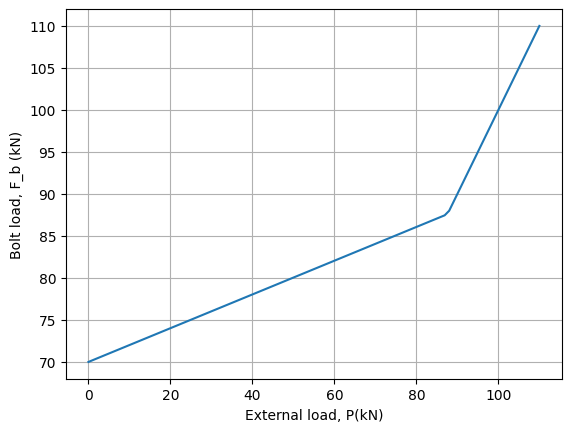

In [ ]:


# External (Seperating) load (kN) fluctuating between 0 and 110 kN
P = np.linspace(0, 110, 101)


#note you can discretize the fluctuating load for plotting

print("Preload (N): " + str(F_i))
print("Seperating load (kN): " + str(P))

print("Calculated values")

k_b = (np.pi*d_b**2/4)*(E/L_eff) # Bolt stiffness (N/mm)
print("Bolt stiffness (N/mm): "+str(k_b))

k_m = (A_m)*(E/L_eff) # Member stiffness (N/mm)
print("Member stiffness (N/mm): "+str(k_m))


C_k = k_b/(k_b + k_m) # Fraction of external (separating) load carried by bolt
print("Fraction of external (separating) load carried by bolt, C_k: "+str(C_k))
print("Fraction of external (separating) load carried by members, 1-C_k: "+str(1-C_k))




F_b = np.zeros(len(P))

# F_m = -F_i+ 1-C_k*P # Member load (kN)
# print("Member load (N): "+str(F_m))


P_sep = (0 + F_i)/(1-C_k)
print("Load at which members seperate load (N): "+str(P_sep))

for i in range(0,len(P)):
  # import pdb; pdb.set_trace()
  if P[i]<P_sep:

    F_b[i] = F_i + C_k*P[i]
    # print(i)
    # print(P[i])
    # print(F_b[i])
  else:
    F_b[i] = P[i]

# F_b = F_i + C_k*P # Bolt load (kN)
# print("Bolt load (N): "+str(F_b))

plt.plot(P,F_b)
plt.xlabel('External load, P(kN)')
plt.ylabel('Bolt load, F_b (kN)')
plt.grid(True)
plt.show()

Fluctuating P from 0 to 110 kN produces

In [ ]:
F_b_min = np.min(F_b)
F_b_max = np.max(F_b)
print("Minimum bolt load (kN): "+str(F_b_min))
print("Maximum bolt load (kN): "+str(F_b_max))

F_b_mean = (F_b_max+F_b_min)/2
print("Mean bolt load (kN): "+str(F_b_mean))
F_b_alternating=(F_b_max-F_b_min)/2
print("Alternating bolt load (kN): "+str(F_b_alternating))

Minimum bolt load (kN): 70.0
Maximum bolt load (kN): 110.0
Mean bolt load (kN): 90.0
Alternating bolt load (kN): 20.0


Factor of safety against exceeding proof strength

In [ ]:
# Factor of safety against exceeding proof strength

n_b = (S_p*A_t/1000-F_i)/(F_b_max-F_i) #Divide by 1000 to convert to kN

print("Factor of safety against exceeding proof strength, n_b: "+str(n_b))

Factor of safety against exceeding proof strength, n_b: 2.3725


Fatigue Analysis

---



Maximum stress on the bolt will be on threaded region in grip. Use the root/minor area.

$\sigma_b = \frac{F_b}{A_r}$

In [ ]:
sigma_mean = F_b_mean*1000/A_r #converting kN to N
print("Mean stress on the bolt (MPa): "+str(sigma_mean))
sigma_alternating = F_b_alternating*1000/A_r #converting kN to N
print("Alternating stress on the bolt (MPa): "+str(sigma_alternating))

print("Applying Modified Goodman Theory")

sigma_eqCR =sigma_alternating/(1-sigma_mean/S_u)
print("Equivalent completely reversible stress (MPa): "+str(sigma_eqCR))

Mean stress on the bolt (MPa): 555.5555555555555
Alternating stress on the bolt (MPa): 123.45679012345678
Applying Modified Goodman Theory
Equivalent completely reversible stress (MPa): 226.6815310293571


Estimate fatigue strength
Using p. 247 Collins et. al. from Chapter 5

In [ ]:
S_prime_f = 0.5*S_u
print("Ideal polished sample's fatigue strength (MPa): "+str(S_prime_f) + " at N = 10e6 cycles")

k_sr = 0.65 # Machined Surface Finish factor (Collins et. al, Fig 5.33, at 610 MPa)
k_sz = 0.90 # Size effect (Collins et. al, Table 5.3)
k_r = 0.81 # Reliability factor (Collins et. al, Table 5.4)
k_f = 1/3.5 # Geometrical discontinuity 1/K_f (K_f given)

S_f = k_sr*k_sz*k_r*k_f*S_prime_f
print("Fatigue strength of the Bolt (MPa): "+str(S_f))



Ideal polished sample's fatigue strength (MPa): 610.0 at N = 10e6 cycles
Fatigue strength of the Bolt (MPa): 82.58528571428573


Note that the estimated fatigue limit is less than the completely reversible stress,

$\sigma_{eq-CR} > S_f$

Thus, infinite life is not predicted.

To estimate life, determine linear fit,
$S_N = blog N + S_u$ at $N=10^6$

Since, $S_N= S_f = 81$ MPa

$⇒81=blog(10^6) +1220$

$⇒b=-189.8$ MPa

$\therefore S_N=-189.8log(N) + 1220 $